In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver2D as s2
import bdf22D as bdf2

## Mesh creation

In [2]:
mesh = BoxMesh(Point(-1, -1, 0), Point(1, 1, 1), 20, 20, 20)
# mesh = UnitCubeMesh(10, 10, 10)
V = FunctionSpace(mesh,"P",1)

## Test Case


In [4]:
m0 = 1e-3
dt = 0.5
T = 150
save_interval = 2
times = [] #[0,7/dt,14/dt,21/dt,28/dt]
doses = [] #10*np.ones_like(times)  
V = FunctionSpace(mesh,"P",2)
# n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
#                 m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigma_x = sqrt(0.008),degree=2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/P2_mesh10x10"

solver = s2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass,phi_vect = solver.solve()


time=0: 
Solving linear variational problem.
iter=1: norm=0.00144709
Solving linear variational problem.
iter=2: norm=2.3205e-06
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
iter=1: norm=0.000294939
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=0.000369958
Solving linear variational problem.
time=1.5: 
Solving linear variational problem.
iter=1: norm=0.000462732
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=0.000577403
Solving linear variational problem.
time=2.5: 
Solving linear variational problem.
iter=1: norm=0.000718299
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=0.00089033
Solving linear variational problem.
time=3.5: 
Solving linear variational problem.
iter=1: norm=0.001099
Solving linear variational problem.
iter=2: norm=7.12303e-06
Solving linear variational problem.
time=4: 
Solving linear vari

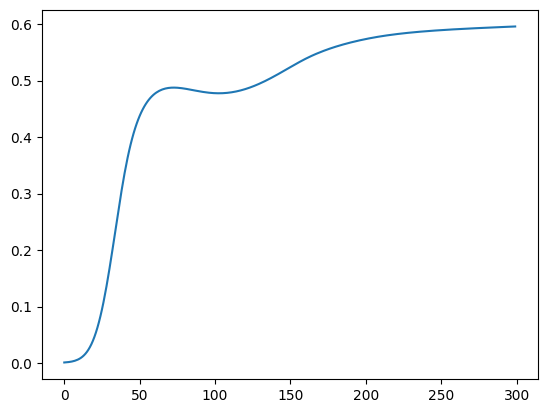

In [4]:
mass = np.load('solutions/P2_mesh10x10/mass.npy')
plt.plot(mass)
# mass2 = np.load('solutions//mass.npy')
# plt.plot(mass2)

NameError: name 'mass_ext' is not defined

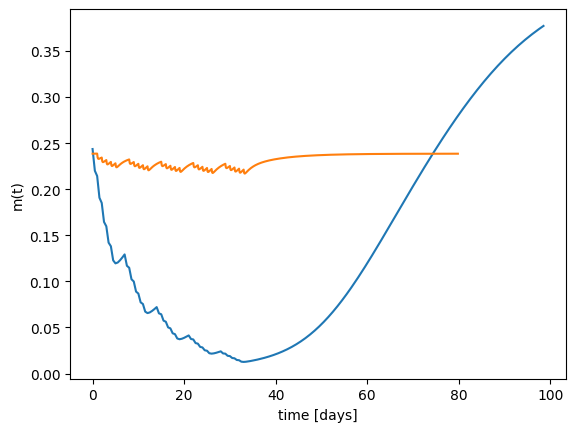

In [11]:
path_sol = "solutions/highwox_frt_T100_bdf2"
mass = np.load(path_sol + '/mass.npy')
mass = mass[2:]
mass2 = np.load("solutions/lowox_frt_T80_dt0.1/mass.npy")
mass2 = mass2[1:]
# mass = mass[:-10]
# mass_ext = np.load("solutions/V3e5_ref20x20_extension/mass.npy")
time2 = np.arange(0,79.9,0.1)
time = np.arange(0,99,0.5)
# masstot = np.concatenate((mass,mass_ext))
plt.plot(time,mass)
plt.plot(time2,mass2)
# plt.xlim([0,60])
plt.ylabel('m(t)')
plt.xlabel('time [days]')
print(mass[-10],mass_ext[0])
# plt.axvline(76, color='r', linestyle='--')


0.23853292572955986 0.21705893523198416


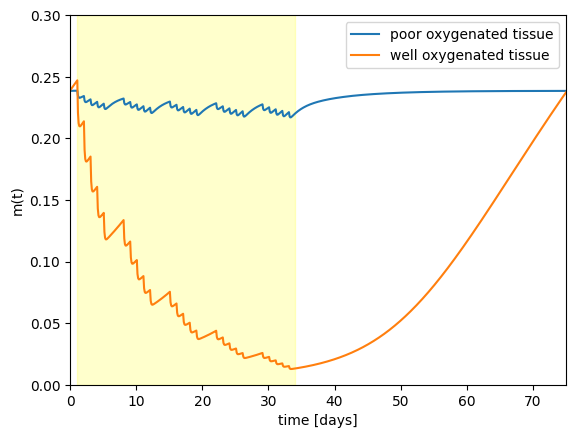

In [27]:
mass = np.load("solutions/lowox_frt_T80_dt0.1/mass.npy")

time = np.arange(0,80,0.1)
plt.plot(time,mass)
mass2 = np.load("solutions/highox_frt_T80_dt0.1/mass.npy")
time2 = np.arange(0,80,0.1)
plt.plot(time2,mass2)
plt.xlim([0,75])
plt.ylim([0,0.3])
plt.ylabel('m(t)')
plt.xlabel('time [days]')
plt.legend(['poor oxygenated tissue','well oxygenated tissue'])
plt.axvspan(1, 34, color='yellow', alpha=0.2, label='Filled Area')
print(mass[0],mass[334])

In [4]:
dt = 0.1
T = 80
save_interval = 2
c0file = XDMFFile('solutions/V3e5_T150_ref20x20/c.xdmf')
n0file = XDMFFile('solutions/V3e5_T150_ref20x20/n.xdmf')
# c0file = XDMFFile('solutions/V3e5_ref20x20_extension/c.xdmf')
# n0file = XDMFFile('solutions/V3e5_ref20x20_extension/n.xdmf')
V = FunctionSpace(mesh,"P",1)
c0 = Function(V)
n0 = Function(V)
c0file.read_checkpoint(c0,"c",15)
n0file.read_checkpoint(n0,"n",15)
# c0file.read_checkpoint(c0,"c",49)
# n0file.read_checkpoint(n0,"n",49)
# times = []
# doses = []
times = [1,2,3,4,5,8,9,10,11,12,15,16,17,18,19,22,23,24,25,26,29,30,31,32,33]
doses = 2*np.ones_like(times)
# times = [0,7,14,21,28]
# doses = 10*np.ones_like(times)

path_sol = "solutions/highox_frt_T80_dt0.1"

solver = bdf2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass,phi_vect = solver.solve()

Solving linear variational problem.
iter=1: norm=0.000160915
Solving linear variational problem.
time=0.1: 
Solving linear variational problem.
iter=1: norm=5.09363e-05
0
0.1
Solving linear variational problem.
time=0.2: 
Solving linear variational problem.
iter=1: norm=0.00122416
Solving linear variational problem.
iter=2: norm=0.000379627
0
0.2
Solving linear variational problem.
time=0.3: 
Solving linear variational problem.
iter=1: norm=0.00116781
Solving linear variational problem.
iter=2: norm=0.000372919
0
0.30000000000000004
Solving linear variational problem.
time=0.4: 
Solving linear variational problem.
iter=1: norm=0.00112168
Solving linear variational problem.
iter=2: norm=0.000360175
0
0.4
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
iter=1: norm=0.00110341
Solving linear variational problem.
iter=2: norm=0.000355382
0
0.5
Solving linear variational problem.
time=0.6: 
Solving linear variational problem.
iter=1: norm=0.00109664
Solvin

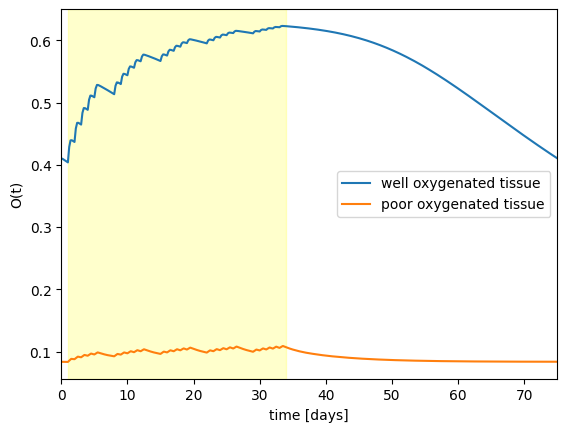

In [11]:
# oxygen level test case 1
V = FunctionSpace(mesh,"P",1)
c = Function(V)
path_sol = "solutions/highox_frt_T80_dt0.1/"
cfile = XDMFFile(path_sol + '/c.xdmf')
ctot1 = []
for i in range(399):
    cfile.read_checkpoint(c,"c",i)
    # print(c.vector().max())
    ctot1.append(assemble(c*dx))
    # ctot.append(c.vector().min())
# cfile = XDMFFile("solutions/V3e5_ref20x20_extension/c.xdmf")
# for j in range(10):
#     cfile.read_checkpoint(c,"c",j*5)
#     ctot.append(assemble(c*dx))
cfile2 = XDMFFile("solutions/lowox_frt_T80_dt0.1/c.xdmf")
ctot2 = []
for j in range(159):
    cfile2.read_checkpoint(c,"c",j)
    ctot2.append(assemble(c*dx))
time = np.arange(0,79.8,0.2)
time2 = np.arange(0,79.5,0.5)
plt.plot(time,ctot1)
plt.plot(time2,ctot2)
plt.xlim([0,75])
# plt.axvline(76, color='r', linestyle='--')
plt.ylabel('O(t)')
plt.xlabel('time [days]')
plt.axvspan(1, 34, color='yellow', alpha=0.2, label='Filled Area')
plt.legend(['well oxygenated tissue','poor oxygenated tissue'])

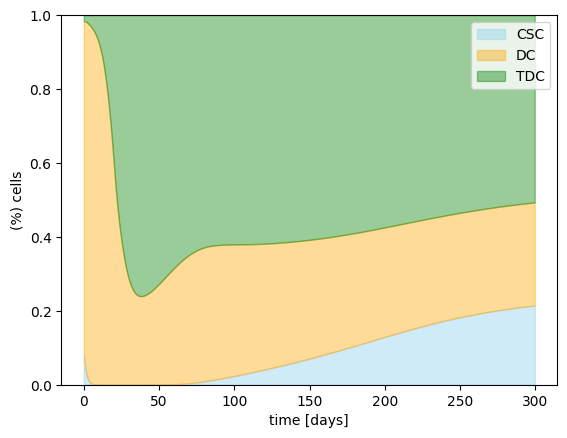

In [17]:
path_sol = "solutions/m01e-3_T300_mesh10/"
csc = np.load(path_sol + '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
# csc = csc[:-10]
# dc = dc[:-10]
# tdc = tdc[:-10]
# csc2 = np.load("solutions/V3e5_ref20x20_extension/csc_mass.npy")
# dc2 = np.load("solutions/V3e5_ref20x20_extension/dc_mass.npy")
# tdc2 = np.load("solutions/V3e5_ref20x20_extension/tdc_mass.npy")
# csc = np.concatenate((csc,csc2))
# dc = np.concatenate((dc,dc2))
# tdc = np.concatenate((tdc,tdc2))
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time=np.arange(0,300,0.5)

plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
# plt.axvline(76, color='r', linestyle='--')
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])

# print(csc[500],dc[500],tdc[500])

## Comparison

In [3]:
path_sol1 = "../Model3D/solutions/test2D_ds0.005_dt0.5_T400_Km0.005/"
mesh2 = UnitSquareMesh(20,20)
V2 = FunctionSpace(mesh2,"P",2)
c = Function(V2)
cfile = XDMFFile(path_sol1 + '/c.xdmf')
c1 = []
for i in range(150):
    cfile.read_checkpoint(c,"c",i)
    c1.append(c.vector().min())
    # ctot.append(assemble(c*dx))


In [5]:
path_sol2 = "solutions/m01e-3_T300_mesh10"
mesh2 = UnitCubeMesh(10,10,10)
V2 = FunctionSpace(mesh2,"P",2)
c = Function(V2)
cfile = XDMFFile(path_sol2 + '/c.xdmf')
c2 = []
for i in range(150):
    cfile.read_checkpoint(c,"c",i)
    c2.append(c.vector().min())
# i =3print(c2[35])

In [15]:
i = 100
print(c1[i])
print(c2[i])

0.03312263131799329
0.03307134398689127


In [16]:
cdiff = np.array(c1)-np.array(c2)
print(np.mean(cdiff),np.std(cdiff))

0.05652293498010914 0.0228555671849544


0.4735715357131068 0.12334286929251416


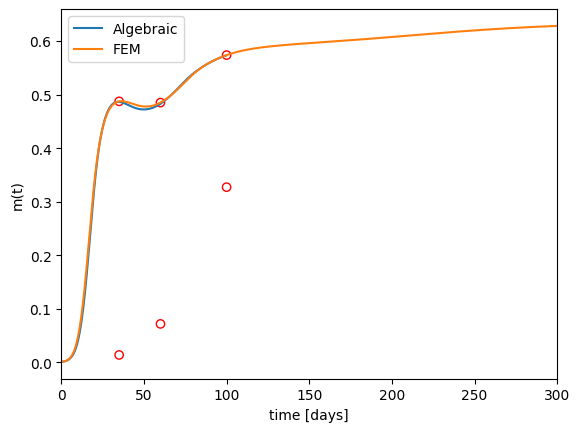

In [5]:
path_sol1 = '../Model3D/solutions/final2D_T100_dt0.1'
path_sol2 = 'solutions/m01e-3_T300_mesh10'
mass1 = np.load(path_sol1 + '/mass.npy')
time1 = np.arange(0,100,0.1)
mass2 = np.load(path_sol2 + '/mass.npy')
time2 = np.arange(0,300,0.5)
plt.plot(time1,mass1)
plt.plot(time2,mass2)
plt.xlim([0,300])
plt.xlabel('time [days]')
plt.ylabel('m(t)')
plt.legend(['Algebraic','FEM'])
xpoints = [35,35,60,60,100,100]
ypoints = [mass1[70],mass2[70],mass1[120],mass2[120],mass1[200],mass2[200]]
plt.scatter(xpoints,ypoints,color='r',facecolors='none')

# print(mass1[50:200])
# x = np.arange(250,1000,5)
# print(np.mean(mass2[x] - mass1[50:200]),np.std(mass2[x] - mass1[50:200]))
mass_alg = mass1[0:600]
mass_fem = mass2

diff = mass_fem - mass_alg
print(np.max(diff),np.std(diff))


0.47805206490208746 0.47012322963096215


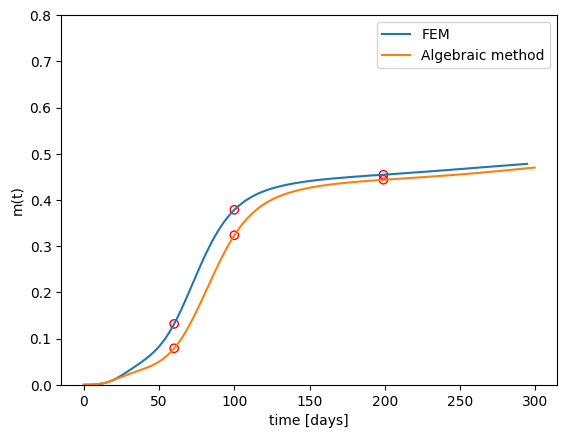

In [6]:
path_sol_fem = "solutions/V3e5_T150_ref20x20"
path_sol_fem2 = "solutions/V3e5_ref20x20_extension"
path_sol_fem3 = "solutions/V3e5_ref20x20_extensionT300"
mass_fem = np.load(path_sol_fem + '/mass.npy')
mass_fem = mass_fem[:-10]
mass_fem2 = np.load(path_sol_fem2 + '/mass.npy')
mass_fem3 = np.load(path_sol_fem3 + '/mass.npy')
mass_fem_tot = np.concatenate((mass_fem,mass_fem2,mass_fem3))
time_fem = np.arange(0,295,0.5)
plt.plot(time_fem,mass_fem_tot)
path_sol_matrix = "../Model3D/solutions/test2D_Vsource_T300_dt0.5"
mass_matrix = np.load(path_sol_matrix + '/mass.npy')
time_matrix = np.arange(0,300,0.5)
plt.plot(time_matrix,mass_matrix)
plt.xlim([0,200])
plt.ylim([0,0.8])
plt.xlabel('time [days]')
plt.ylabel('m(t)')
plt.legend(['FEM','Algebraic method'])
print(mass_fem_tot[-1],mass_matrix[-1])
xpoints = [60,60,100,100,199,199]
ypoints = [mass_fem_tot[120],mass_matrix[120],mass_fem_tot[200],mass_matrix[200],mass_fem_tot[398],mass_matrix[398]]
plt.scatter(xpoints,ypoints,color='r',facecolors='none')

In [9]:
diff = mass_fem_tot - mass_matrix[:-10]
np.max(diff)

0.08135078002068835

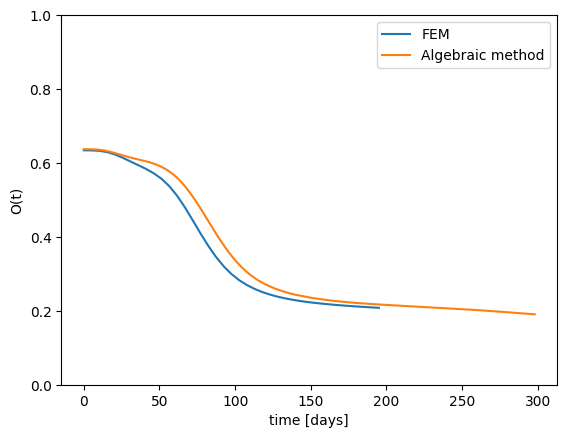

In [27]:
cfile_fem = XDMFFile(path_sol_fem + '/c.xdmf')
cfile_fem2 = XDMFFile(path_sol_fem2 + '/c.xdmf')
c_fem = []
c = Function(V)
for i in range(29):
    cfile_fem.read_checkpoint(c,"c",i)
    c_fem.append(assemble(c*dx))
for j in range(10):
    cfile_fem2.read_checkpoint(c,"c",j*5)
    c_fem.append(assemble(c*dx))
time_fem = np.linspace(0,195,39)
plt.plot(time_fem,c_fem)

cfile_matrix = XDMFFile(path_sol_matrix + '/c.xdmf')
mesh_matrix = RectangleMesh(Point(-1,-1),Point(1,1),20,20)
V_matrix = FunctionSpace(mesh_matrix,"P",2)
c_matrix = Function(V_matrix)
c_matrix_tot = []
for i in range(299):
    cfile_matrix.read_checkpoint(c_matrix,"c",i)
    c_matrix_tot.append(assemble(c_matrix*dx))
time_matrix = np.arange(0,299)
plt.plot(time_matrix,c_matrix_tot)
# plt.xlim([0,195])
plt.ylim([0,1])
plt.xlabel('time [days]')
plt.ylabel('O(t)')
plt.legend(['FEM','Algebraic method'])

In [28]:
cmatrix = c_matrix_tot[0::5]
c_matrix_tot = cmatrix[:39]
cdiff = np.array(c_matrix_tot) - np.array(c_fem)

In [32]:
print(np.max(cdiff))
print(cdiff[-1])

0.08130658562127152
0.010326768428010086
